In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("evgeni_set.csv")
df['age'] = df['age']/110 #нормализация

In [3]:
#Меня не устраивает что  в train_test_split может в тестовую выборку попасть 0 инфарктов или все 100
#поэтому разделю вручную и соеденю после деления обратно
df_heartattack_x = df[df['minf']==1].iloc[:, 1:]
df_heartattack_y = df[df['minf']==1].iloc[:, 0]
df_no_heartattack_x = df[df['minf']==0].iloc[:, 1:]
df_no_heartattack_y = df[df['minf']==0].iloc[:, 0]

In [4]:
df_heartattack_x_train, df_heartattack_x_test, df_heartattack_y_train, df_heartattack_y_test = train_test_split(df_heartattack_x, df_heartattack_y, test_size=0.2)
df_no_heartattack_x_train, df_no_heartattack_x_test, df_no_heartattack_y_train, df_no_heartattack_y_test = train_test_split(df_no_heartattack_x, df_no_heartattack_y, test_size=0.2)

In [5]:
x_train = pd.concat((df_heartattack_x_train, df_no_heartattack_x_train), axis=0)
y_train = pd.concat((df_heartattack_y_train, df_no_heartattack_y_train), axis=0)
x_test = pd.concat((df_heartattack_x_test, df_no_heartattack_x_test), axis=0)
y_test = pd.concat((df_heartattack_y_test, df_no_heartattack_y_test), axis=0)

#проверка соответствия id после склейки
if all(y_test.index==x_test.index) and all(y_train.index==x_train.index):
    print('Данные склеены правильно')

Данные склеены правильно


In [2]:
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score, f1_score, precision_score
from tqdm import tqdm

iter_max_depth = list(range(6, 14))
iter_n_estimators = list(range(100, 800, 50))

#все возможные комбинации параметров
a = [iter_n_estimators, iter_max_depth]
iters = [list(x) for x in np.array(np.meshgrid(*a)).T.reshape(-1,len(a))]#все возможные комбинации параметров

results = {'iter_n_estimators':[], 'iter_max_depth':[],
            'train_recall_score':[], 'train_f1_score':[], 'train_precision_score':[],
            'test_recall_score':[], 'test_f1_score':[], 'test_precision_score':[]}
for i in tqdm(iters):
        model = CatBoostClassifier(n_estimators=i[0], depth=i[1], learning_rate=1, loss_function='Logloss', verbose=False)
        model.fit(x_train, y_train)
        test_y_pred = model.predict(x_test)
        train_y_pred = model.predict(x_train)
        results['iter_n_estimators'].append(i[0])
        results['iter_max_depth'].append(i[1])
        results['train_recall_score'].append(recall_score(y_train, train_y_pred))
        results['train_f1_score'].append(f1_score(y_train, train_y_pred))
        results['train_precision_score'].append(precision_score(y_train, train_y_pred))
        results['test_recall_score'].append(recall_score(y_test, test_y_pred))
        results['test_f1_score'].append(f1_score(y_test, test_y_pred))
        results['test_precision_score'].append(precision_score(y_test, test_y_pred))

NameError: name 'np' is not defined

In [7]:
df_results=pd.DataFrame(results)
df_results

,iter_n_estimators,iter_max_depth,train_recall_score,train_f1_score,train_precision_score,test_recall_score,test_f1_score,test_precision_score
0,100,6,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
1,100,7,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
2,100,8,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
3,100,9,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
4,100,10,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
...,...,...,...,...,...,...,...,...
107,750,9,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
108,750,10,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
109,750,11,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
110,750,12,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529


In [8]:
df_results[df_results['test_recall_score']==df_results['test_recall_score'].max()]

,iter_n_estimators,iter_max_depth,train_recall_score,train_f1_score,train_precision_score,test_recall_score,test_f1_score,test_precision_score
0,100,6,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
1,100,7,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
2,100,8,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
3,100,9,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
4,100,10,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
...,...,...,...,...,...,...,...,...
107,750,9,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
108,750,10,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
109,750,11,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529
110,750,12,0.583333,0.715328,0.924528,0.666667,0.736842,0.823529


In [9]:
df_results.iloc[0]

iter_n_estimators        100.000000
iter_max_depth             6.000000
train_recall_score         0.583333
train_f1_score             0.715328
train_precision_score      0.924528
test_recall_score          0.666667
test_f1_score              0.736842
test_precision_score       0.823529
Name: 0, dtype: float64

[[787   2]
 [  9  12]] 
 roc_auc_score 0.9908564186130726
 rec: 0.5714285714285714
 prec: 0.8571428571428571
 f1: 0.6857142857142857



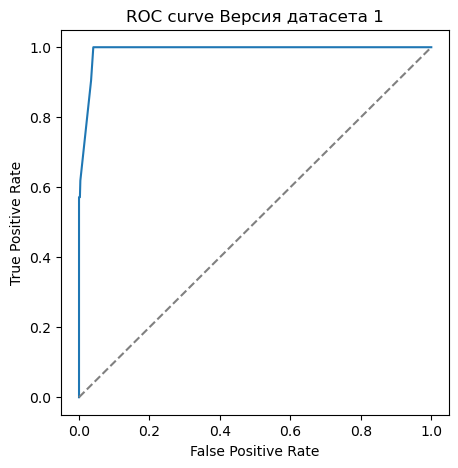

In [16]:
from catboost import CatBoostClassifier
from sklearn.metrics import recall_score, f1_score, precision_score, roc_auc_score
model = CatBoostClassifier(n_estimators=40, depth=5, learning_rate=1, loss_function='Logloss', verbose=False)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_proba = model.predict_proba(x_test)
y_proba = y_proba[:, 1]
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred), '\n', 
f'roc_auc_score {roc_auc_score(y_test, y_proba)}\n', 
f'rec: {recall_score(y_test, y_pred)}\n',
f'prec: {precision_score(y_test, y_pred)}\n',
f'f1: {f1_score(y_test, y_pred)}\n',
)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba, pos_label=1)
plt.rcParams['figure.figsize'] = 5, 5
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve Версия датасета 1')
plt.show()

[[3147    5]
 [  33   51]] 
 roc_auc_score 0.9928843364757071
 rec: 0.6071428571428571
 prec: 0.9107142857142857
 f1: 0.7285714285714285



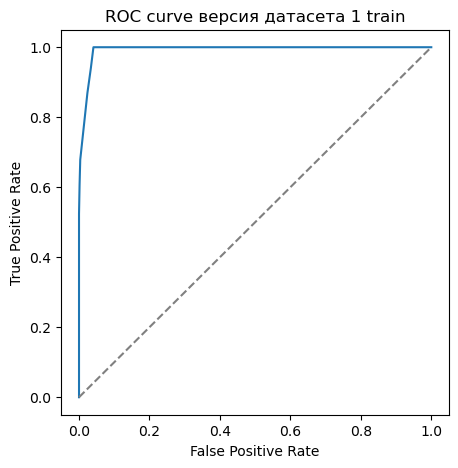

In [18]:
#результаты по тренировочным
y_pred = model.predict(x_train)
y_proba = model.predict_proba(x_train)
y_proba = y_proba[:, 1]
print(confusion_matrix(y_train, y_pred), '\n', 
f'roc_auc_score {roc_auc_score(y_train, y_proba)}\n', 
f'rec: {recall_score(y_train, y_pred)}\n',
f'prec: {precision_score(y_train, y_pred)}\n',
f'f1: {f1_score(y_train, y_pred)}\n',
)

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_proba, pos_label=1)
plt.rcParams['figure.figsize'] = 5, 5
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='grey', linestyle='dashed')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve версия датасета 1 train')
plt.show()

Подбор порога

In [13]:
from tqdm import tqdm

prediction = model.predict_proba(x_test)
threshold_results = {'threshold':[], 'test_recall_score':[], 'test_f1_score':[], 'test_precision_score':[]}
iters = prediction[:, 1].copy()
iters.sort()
iters = np.unique(iters)

for i in tqdm(iters[:300]):
    predict_mine = []
    for i2 in prediction:
        if i2[1]>i:
            predict_mine.append(1)
        else:
            predict_mine.append(0)
            
    threshold_results['threshold'].append(i)
    threshold_results['test_recall_score'].append(recall_score(y_test, predict_mine))
    threshold_results['test_f1_score'].append(f1_score(y_test, predict_mine))
    threshold_results['test_precision_score'].append(precision_score(y_test, predict_mine))

 98%|█████████▊| 235/239 [00:02<00:00, 118.16it/s]e:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 239/239 [00:02<00:00, 113.22it/s]


In [14]:
df_threshold_results = pd.DataFrame(threshold_results)
df_threshold_results

,threshold,test_recall_score,test_f1_score,test_precision_score
0,0.000012,1.000000,0.050847,0.026087
1,0.000013,1.000000,0.051282,0.026316
2,0.000013,1.000000,0.051408,0.026382
3,0.000014,1.000000,0.051471,0.026415
4,0.000015,1.000000,0.052369,0.026889
...,...,...,...,...
234,0.954023,0.380952,0.551724,1.000000
235,0.954127,0.285714,0.444444,1.000000
236,0.971964,0.190476,0.320000,1.000000
237,0.972759,0.047619,0.090909,1.000000


Text(0, 0.5, 'метрика')

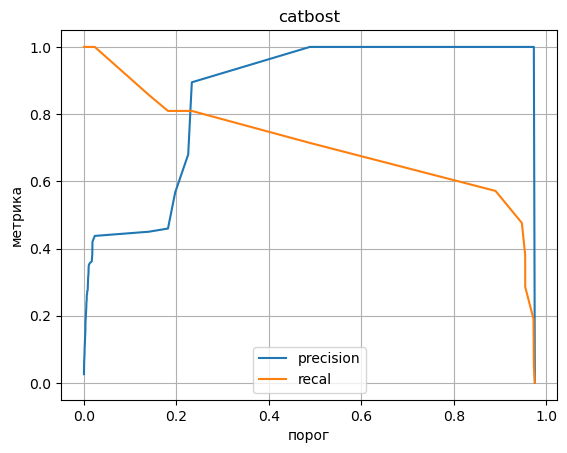

In [15]:
import matplotlib.pyplot as plt
plt.plot(df_threshold_results['threshold'], df_threshold_results['test_precision_score'], label='precision')
plt.plot(df_threshold_results['threshold'], df_threshold_results['test_recall_score'], label='recal')
plt.grid()
plt.legend()
plt.title('catbost')
plt.xlabel('порог')
plt.ylabel('метрика')

In [21]:
df_threshold_results.iloc[230]#вручную искал

threshold               0.233245
test_recall_score       0.809524
test_f1_score           0.850000
test_precision_score    0.894737
Name: 230, dtype: float64

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
model = KNeighborsClassifier(n_neighbors=4)#вручную либо есть  n_neighbors=2 с rec 0.8 и prec 0.51
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
print("recall: "+str(recall_score(y_test, y_pred)))
print("precision: "+str(precision_score(y_test, y_pred)))
print("accuracy_score: "+str(accuracy_score(y_test, y_pred)))
print("Доля обектов отнесеных к классу 1 от тестовой выборки: "+str(round((sum(matrix[:, 1])/x_test.shape[0])*100))+'%')

[[769  20]
 [  3  18]]
recall: 0.8571428571428571
precision: 0.47368421052631576
accuracy_score: 0.971604938271605
Доля обектов отнесеных к классу 1 от тестовой выборки: 5%


e:\Anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Кросвалидация нормализованых данных

In [6]:
from sklearn.model_selection import cross_validate
from catboost import CatBoostClassifier
scoring = ['precision_macro', 'recall_macro']
clf = CatBoostClassifier(n_estimators=40, depth=5, learning_rate=1, loss_function='Logloss', verbose=False)
scores = cross_validate(clf, df.iloc[:, 1:], df.iloc[:, 0], scoring=scoring)

In [7]:
scores

{'fit_time': array([0.96897101, 0.26123357, 0.3108983 , 0.22330284, 0.30663276]),
 'score_time': array([0.1008184 , 0.00399876, 0.00399685, 0.00399804, 0.0039978 ]),
 'test_precision_macro': array([0.8844697 , 0.99373434, 0.99373434, 0.99373434, 0.99373434]),
 'test_recall_macro': array([0.83079848, 0.76190476, 0.76190476, 0.76190476, 0.76190476])}

In [8]:
scores['test_recall_macro'].mean()

0.7756835053413

In [9]:
scores['test_precision_macro'].mean()

0.9718814080656184

Кроссвалидация не нормализованных данных

In [3]:
df = pd.read_csv("evgeni_set.csv")
scoring = ['precision_macro', 'recall_macro']
clf = CatBoostClassifier(n_estimators=40, depth=5, learning_rate=1, loss_function='Logloss', verbose=False)
scores = cross_validate(clf, df.iloc[:, 1:], df.iloc[:, 0], scoring=scoring)

In [5]:
scores['test_recall_macro'].mean()

0.7756835053413

In [4]:
scores['test_precision_macro'].mean()

0.9718814080656184

Собственно разницы нет потомучто нормализация и масштабирование важны для линейных моделей, а для деревянных и бустингов она что есть, что ее нет

In [9]:
#Сохраню конечную модель
model = CatBoostClassifier(n_estimators=40, depth=5, learning_rate=1, loss_function='Logloss', verbose=False)
model.fit(df.iloc[:, 1:], df.iloc[:, 0])

import pickle
pickle.dump(model, open('catboost_model.sav', 'wb'))